In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.models.load_model('model.h5')

In [29]:
IMG_SIZE = 224
directory_data_test = "data/data4/test"
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_ds = test_datagen.flow_from_directory(
    directory=directory_data_test,
    batch_size=32,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    shuffle=False
)


Found 139 images belonging to 14 classes.


In [30]:
class_labels = list(test_ds.class_indices)
print(class_labels)

['apple', 'banana', 'carrot', 'corn', 'cucumber', 'grapes', 'kiwi', 'lemon', 'mango', 'orange', 'pear', 'pineapple', 'tomato', 'watermelon']


In [31]:
import matplotlib.pyplot as plt

# Đánh giá mô hình
loss, accuracy = model.evaluate(test_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}')

/Users/nguyenminhquan/Code/Python/machine_learning/cnn_fruit_classification/myvenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 0.9439 - loss: 0.3256
Loss: 0.22033937275409698, Accuracy: 0.9568345546722412


In [32]:
# model.summary()

In [33]:
import pickle

# Tải lại lịch sử huấn luyện
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

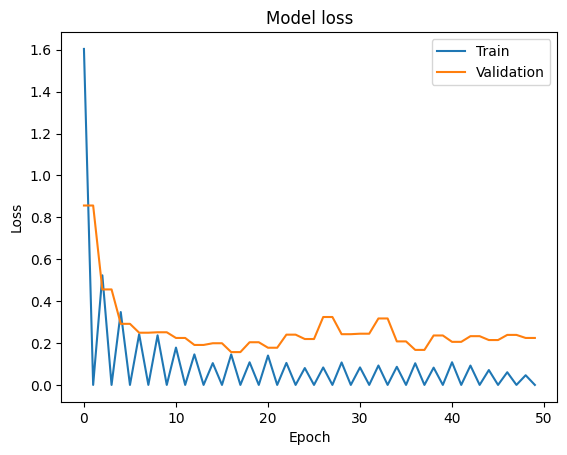

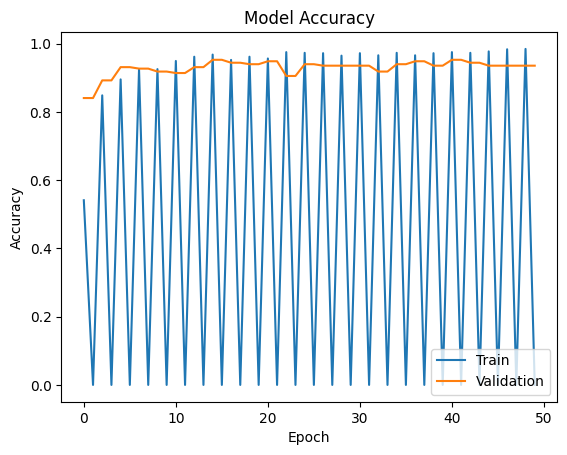

In [34]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


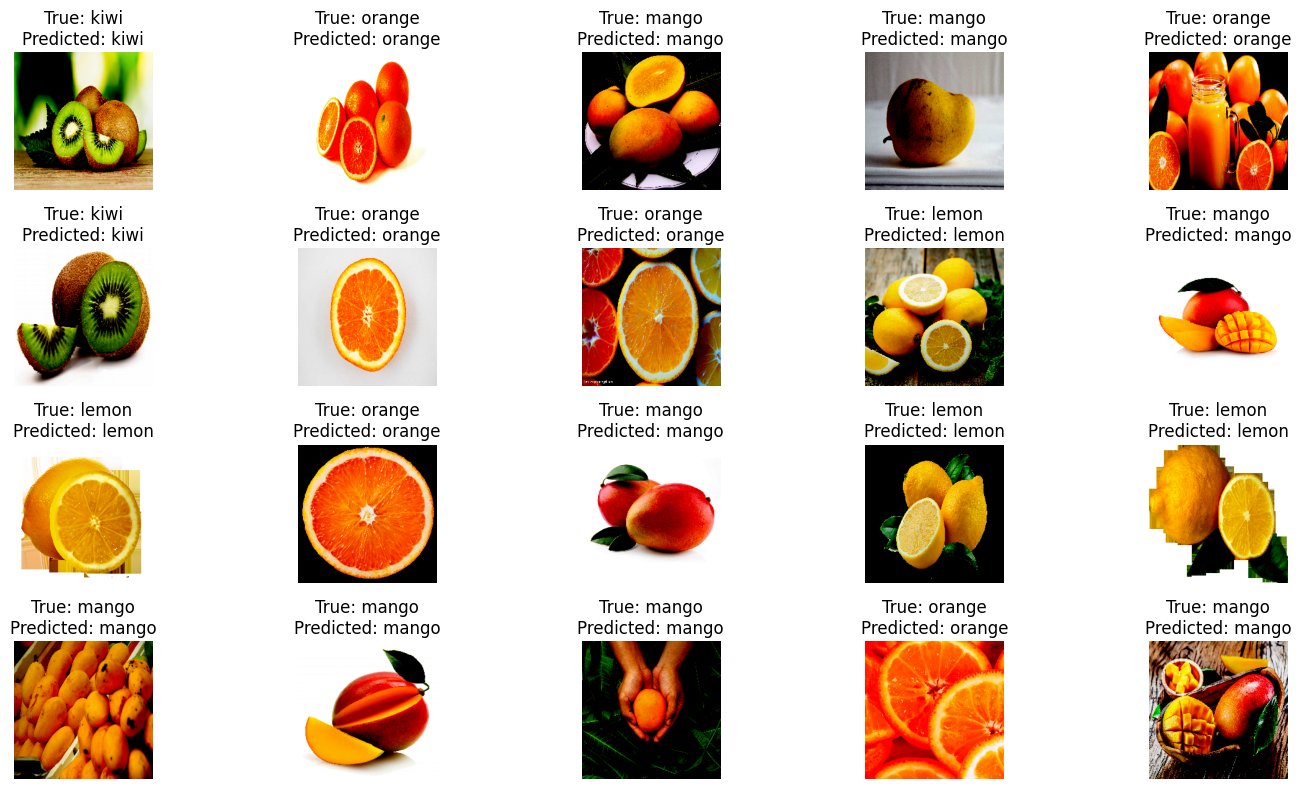

: 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

def plot_predictions(model, ds, num_images=20, num_images_per_row=5):
    class_labels = list(ds.class_indices.keys())
    
    # Lấy toàn bộ hình ảnh và nhãn từ dataset
    image_list = []
    label_list = []
    for image_batch, label_batch in ds:
        image_list.extend(image_batch)
        label_list.extend(label_batch)
        if len(image_list) >= num_images:
            break
    
    # Chuyển đổi danh sách thành mảng NumPy
    image_list = np.array(image_list)
    label_list = np.array(label_list)
    
    # Xáo trộn dữ liệu
    indices = np.arange(len(image_list))
    np.random.shuffle(indices)
    image_list = image_list[indices]
    label_list = label_list[indices]
    
    # Chọn số lượng hình ảnh cần thiết
    image_list = image_list[:num_images]
    label_list = label_list[:num_images]
    
    # Dự đoán
    predictions = model.predict(image_list)
    
    # Tính toán số hàng cần thiết
    num_rows = int(np.ceil(num_images / num_images_per_row))
    
    plt.figure(figsize=(num_images_per_row * 3, num_rows * 2))
    
    for i in range(num_images):
        predicted_class = class_labels[np.argmax(predictions[i])]
        true_class = class_labels[np.argmax(label_list[i])]
        
        plt.subplot(num_rows, num_images_per_row, i + 1)
        plt.imshow(image_list[i])
        plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng:
plot_predictions(model, test_ds, num_images=20, num_images_per_row=5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


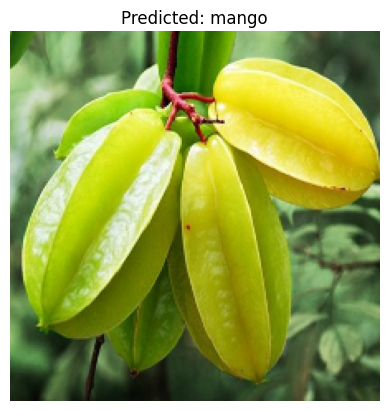

Predicted Label: mango


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

def plot_single_prediction(model, ds,image_path, img_size):
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0 

    predictions = model.predict(img_array)
    
    class_labels = list(ds.class_indices)
    predicted_index = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_index]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

# Ví dụ sử dụng:
image_path = 'data/data3/validation/khe.png'
predicted_label = plot_single_prediction(model, test_ds, image_path, img_size=IMG_SIZE)
print(f"Predicted Label: {predicted_label}")


In [37]:
# Đánh giá mô hình trên tập kiểm thử
test_loss, test_accuracy = model.evaluate(test_ds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.9439 - loss: 0.3256
Test Accuracy: 0.9568
Test Loss: 0.2203


In [38]:
# Dự đoán trên tập kiểm thử
y_pred = model.predict(test_ds)
y_pred_classes = y_pred.argmax(axis=-1)

# Lấy nhãn thực tế từ tập kiểm thử
y_true = test_ds.classes

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/stepWARNING:tensorflow:5 out of the last 1425 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x356b5efc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step


In [39]:
from sklearn.metrics import classification_report

# Báo cáo phân loại
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=test_ds.class_indices.keys()))

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        10
      banana       1.00      0.78      0.88         9
      carrot       1.00      1.00      1.00        10
        corn       1.00      1.00      1.00        10
    cucumber       1.00      1.00      1.00        10
      grapes       1.00      0.70      0.82        10
        kiwi       1.00      1.00      1.00        10
       lemon       0.90      0.90      0.90        10
       mango       0.91      1.00      0.95        10
      orange       0.83      1.00      0.91        10
        pear       1.00      1.00      1.00        10
   pineapple       1.00      1.00      1.00        10
      tomato       0.91      1.00      0.95        10
  watermelon       0.91      1.00      0.95        10

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.95       139
weighted avg       0.96      0.96      0.96       139



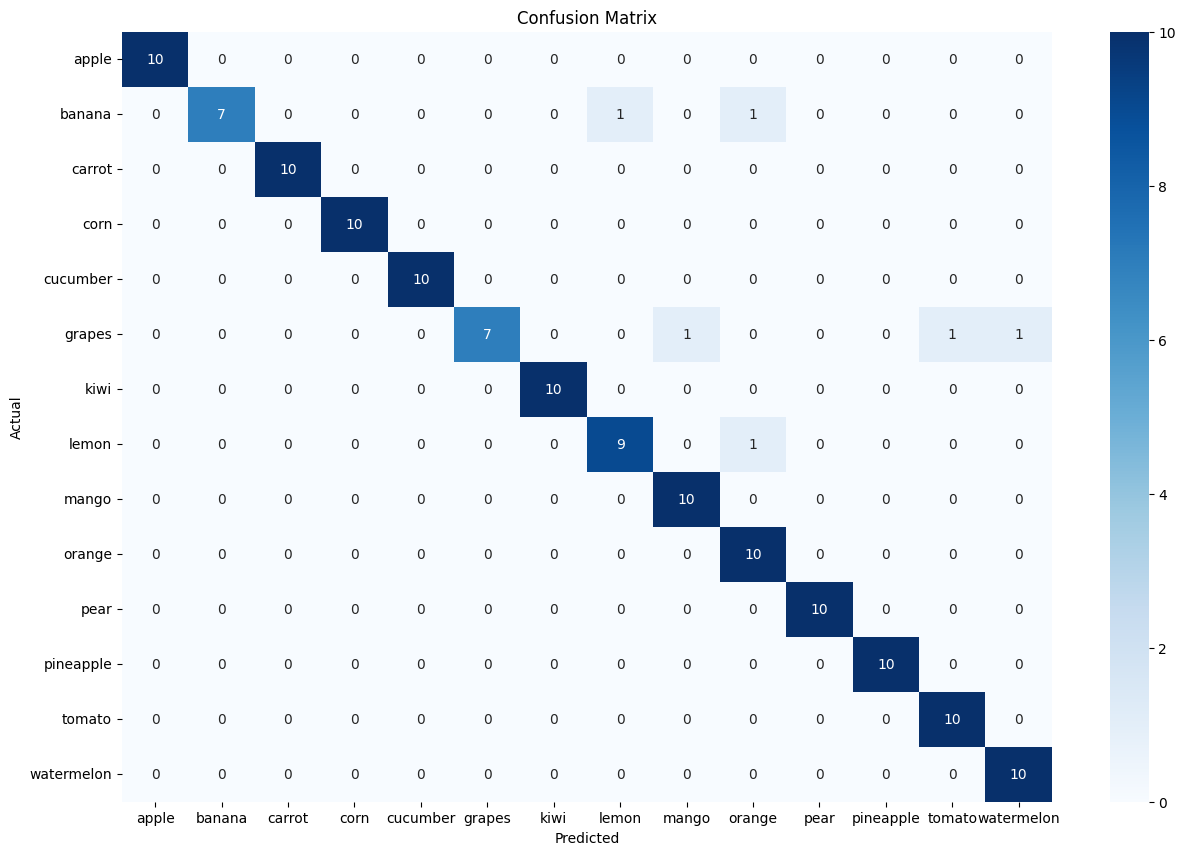

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_ds.class_indices.keys(), yticklabels=test_ds.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [41]:
import numpy as np

class_labels = list(test_ds.class_indices)
y_true = []
y_pred = []

# Số lượng ảnh cần dự đoán
num_images_to_predict = int(len(test_ds) * test_ds.batch_size )
count = 0

# Duyệt qua các batch trong test_ds
for image_batch, label_batch in test_ds:
    predictions = model.predict(image_batch)
    
    # Duyệt qua từng ảnh trong batch
    for i in range(len(image_batch)):
        if count >= num_images_to_predict:
            break  # Dừng nếu đã dự đoán đủ dữ liệu
        predicted_class = class_labels[np.argmax(predictions[i])]
        true_class = class_labels[np.argmax(label_batch[i])]
        y_true.append(true_class)
        y_pred.append(predicted_class)
        count += 1
    
    if count >= num_images_to_predict:
        break  # Dừng nếu đã dự đoán đủ dữ liệu



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính Precision, Recall, và F1-Score với average
def evaluate_model(average='weighted'):
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    
    print(f"({average})")

    print(f"Precision ({average}):", precision)
    print(f"Recall ({average}):", recall)
    print(f"F1-Score ({average}):", f1)

evaluate_model('weighted')
evaluate_model('micro')
evaluate_model('macro')

(weighted)
Precision (weighted): 0.9615530303030304
Recall (weighted): 0.95625
F1-Score (weighted): 0.9548193993506493
(micro)
Precision (micro): 0.95625
Recall (micro): 0.95625
F1-Score (micro): 0.95625
(macro)
Precision (macro): 0.956060606060606
Recall (macro): 0.9565759637188209
F1-Score (macro): 0.952234075448361


In [43]:

def plot_single_prediction(model, ds,image_path, img_size):
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0 

    predictions = model.predict(img_array)
    
    class_labels = list(ds.class_indices)
    predicted_index = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_index]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label


In [44]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing import image

# # Khởi tạo camera
# cap = cv2.VideoCapture(0)  # Sử dụng camera mặc định, có thể thay đổi nếu sử dụng camera khác

# # Kiểm tra nếu camera không mở được
# if not cap.isOpened():
#     print("Cannot open camera")
#     exit()


# while True:
#     # Lấy ảnh từ camera
#     ret, frame = cap.read()

#     # Nếu không thể đọc ảnh thì thoát
#     if not ret:
#         print("Can't receive frame (stream end?). Exiting ...")
#         break

#     # Tiền xử lý ảnh
#     img_array = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
#     img_array = image.img_to_array(img_array)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0  # Chuẩn hóa ảnh

#     # Dự đoán nhãn từ mô hình
#     predictions = model.predict(img_array)
#     predicted_index = np.argmax(predictions[0])
#     predicted_label = class_labels[predicted_index]

#     # Hiển thị kết quả lên màn hình
#     cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

#     # Hiển thị khung hình
#     cv2.imshow('Prediction', frame)

#     # Nhấn 'q' để thoát
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Giải phóng camera và đóng tất cả cửa sổ
# cap.release()
# cv2.destroyAllWindows()
